### Webscrape Wikipedia table

In [113]:
import pandas as pd
import numpy as np

link = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
tables = pd.read_html(link) #List of tables in a url

toronto_loc = tables[0]
#Notice that only "Not assigned" values for Borough return NaN for neighbourhood
#We can safely drop all NaN rows. Neighborhoods have also been pre-collated into corresponding postal code
toronto_loc.dropna(inplace=True)

toronto_loc.reset_index(inplace=True)
toronto_loc = toronto_loc.iloc[:,1:]

toronto_loc.head()

,Postal Code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [114]:
lat_long = pd.read_csv('https://cocl.us/Geospatial_data')

#Create dictionaries of Latitiude and Longitude, linked to corresponding Postal Code
lat_dict = {}
long_dict = {}

for i in range(len(lat_long)):
    lat_dict[lat_long['Postal Code'][i]] = lat_long['Latitude'][i]
    long_dict[lat_long['Postal Code'][i]] = lat_long['Longitude'][i] 

In [115]:
#Create dataframe columns for Latitude and Longtitude
toronto_loc['Latitude'] = pd.DataFrame(np.zeros(len(toronto_loc)))
toronto_loc['Longitude'] = pd.DataFrame(np.zeros(len(toronto_loc)))

In [116]:
#List of Postal Codes from the Dataframe
postal_code = list(toronto_loc['Postal Code'])

In [117]:
#Reassign Latitude and Longitude values based on Postal Code
for code in postal_code:
    for j in range(len(toronto_loc)):
        if toronto_loc['Postal Code'][j] == code:
            toronto_loc['Latitude'][j] = lat_dict.get(code)
            toronto_loc['Longitude'][j] = long_dict.get(code)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [118]:
print("Number of unique boroughs is ", len(toronto_loc['Borough'].unique()))

Number of unique boroughs is  10


In [119]:
toronto_loc['Borough'].unique()

array(['North York', 'Downtown Toronto', 'Etobicoke', 'Scarborough',
       'East York', 'York', 'East Toronto', 'West Toronto',
       'Central Toronto', 'Mississauga'], dtype=object)

In [124]:
import copy
toronto = toronto_loc.copy()

In [125]:
boroughs = ['Downtown Toronto','East Toronto', 'West Toronto','Central Toronto']
toronto = toronto.set_index('Borough') #If this cell of codes don't work, rerun the code and wait
toronto = toronto.iloc[:,1:]
toronto = toronto.loc[boroughs]
toronto

,Neighborhood,Latitude,Longitude
Borough,,,
Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
Downtown Toronto,St. James Town,43.651494,-79.375418
Downtown Toronto,Berczy Park,43.644771,-79.373306
Downtown Toronto,Central Bay Street,43.657952,-79.387383
Downtown Toronto,Christie,43.669542,-79.422564
Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568
Downtown Toronto,"Harbourfront East, Union Station, Toronto Islands",43.640816,-79.381752


In [126]:
#Turn Boroughs into categorical variable
toronto = toronto.reset_index()
toronto_onehot = pd.get_dummies(toronto[['Borough']], prefix="", prefix_sep="")

In [130]:
toronto_onehot['Neighborhood'] = toronto['Neighborhood']
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot

,Neighborhood,Central Toronto,Downtown Toronto,East Toronto,West Toronto
0,"Regent Park, Harbourfront",0,1,0,0
1,"Queen's Park, Ontario Provincial Government",0,1,0,0
2,"Garden District, Ryerson",0,1,0,0
3,St. James Town,0,1,0,0
4,Berczy Park,0,1,0,0
5,Central Bay Street,0,1,0,0
6,Christie,0,1,0,0
7,"Richmond, Adelaide, King",0,1,0,0
8,"Harbourfront East, Union Station, Toronto Islands",0,1,0,0
9,"Toronto Dominion Centre, Design Exchange",0,1,0,0


In [131]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()

In [132]:
toronto_grouped

,Neighborhood,Central Toronto,Downtown Toronto,East Toronto,West Toronto
0,Berczy Park,0,1,0,0
1,"Brockton, Parkdale Village, Exhibition Place",0,0,0,1
2,"Business reply mail Processing Centre, South C...",0,0,1,0
3,"CN Tower, King and Spadina, Railway Lands, Har...",0,1,0,0
4,Central Bay Street,0,1,0,0
5,Christie,0,1,0,0
6,Church and Wellesley,0,1,0,0
7,"Commerce Court, Victoria Hotel",0,1,0,0
8,Davisville,1,0,0,0
9,Davisville North,1,0,0,0


In [136]:
columns = ['Neighborhood']
neighborhoods_sorted = pd.DataFrame(columns=columns)
neighborhoods_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

In [134]:
from sklearn.cluster import KMeans
import folium

#Cluster into 4
kclusters = 4 #Number of Toronto-named Boroughs
toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 2, 3, 0, 0, 0, 0, 0, 1, 1], dtype=int32)

In [137]:
# add clustering labels
neighborhoods_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = toronto

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head() # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels
0,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,0
1,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,0
2,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,0
3,Downtown Toronto,St. James Town,43.651494,-79.375418,0
4,Downtown Toronto,Berczy Park,43.644771,-79.373306,0


In [138]:
toronto_merged

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels
0,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,0
1,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,0
2,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,0
3,Downtown Toronto,St. James Town,43.651494,-79.375418,0
4,Downtown Toronto,Berczy Park,43.644771,-79.373306,0
5,Downtown Toronto,Central Bay Street,43.657952,-79.387383,0
6,Downtown Toronto,Christie,43.669542,-79.422564,0
7,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568,0
8,Downtown Toronto,"Harbourfront East, Union Station, Toronto Islands",43.640816,-79.381752,0
9,Downtown Toronto,"Toronto Dominion Centre, Design Exchange",43.647177,-79.381576,0


In [143]:
from geopy.geocoders import Nominatim
import matplotlib.cm as cm
import matplotlib.colors as colors
ddress = 'Toronto, ON'

geolocator = Nominatim(user_agent="on_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

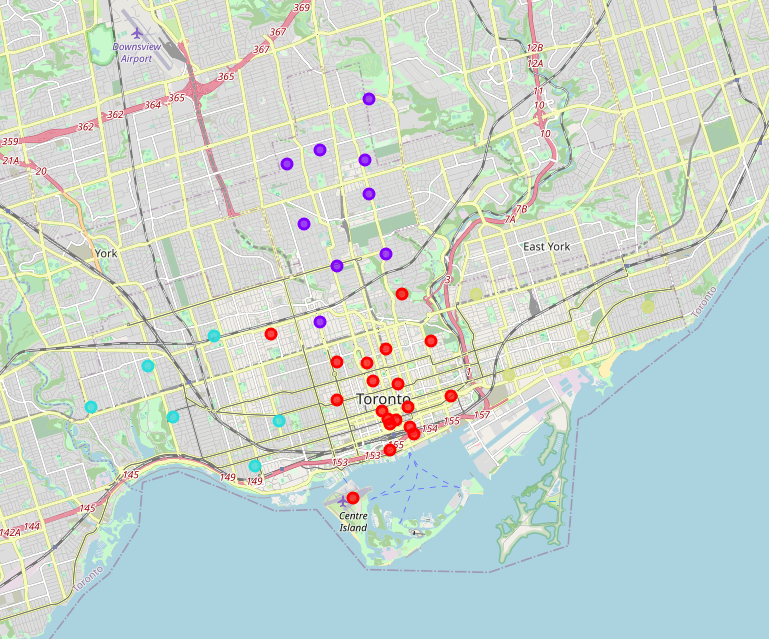